In [ ]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

In [3]:
model = YOLO('yolov8n-seg.yaml') # building a model of instance segmentation, this only brings the structure with random weights;
model = YOLO('yolov8n-seg.pt') # now, filling thats trcuture with random weights;

100%|██████████| 6.73M/6.73M [00:00<00:00, 124MB/s]


In [ ]:
# as this is not trained on our dataset particularly, so i am gonna finetune it;

In [5]:
# number of classes based on YAML, basically reading the YAML, as the YAMLfile contains all the info, the no of classes, the path of test(if any), train, val images;
import yaml
with open("/content/drive/MyDrive/YOLOv8_with_teeth/Dataset/data_teeth_colab.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [6]:
num_classes

'1'

In [7]:
%cat "/content/drive/MyDrive/YOLOv8_with_teeth/Dataset/data_teeth_colab.yaml"

train: /content/drive/MyDrive/YOLOv8_with_teeth/Dataset/train
val: /content/drive/MyDrive/YOLOv8_with_teeth/Dataset/valid
test: /content/drive/MyDrive/YOLOv8_with_teeth/Dataset/test
nc: 1
names: ['Tooth']

roboflow:
  workspace: eoinm
  project: tooth-rftaw
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/eoinm/tooth-rftaw/dataset/1

In [8]:
epochs = 40

In [9]:
project = "/content/drive/MyDrive/YOLOv8_with_teeth/results_of_training" # a directory, that holds all the training things;
name = str(epochs) # a sub-directory for specific no. of epochs; if again run, then will create another folder as "no_of_epochs"-2;

In [10]:
results = model.train(data="/content/drive/MyDrive/YOLOv8_with_teeth/Dataset/data_teeth_colab.yaml", # --> the data is only the yaml file, as this only says where the training and val data staying;
                      project=project, # the project directory;
                      name=name,
                      epochs= epochs,
                      patience=0,
                      batch=4,
                      imgsz=800)


Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/YOLOv8_with_teeth/Dataset/data_teeth_colab.yaml, epochs=40, time=None, patience=0, batch=4, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/YOLOv8_with_teeth/results_of_training, name=40, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

100%|██████████| 755k/755k [00:00<00:00, 25.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 116MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/YOLOv8_with_teeth/Dataset/train/labels... 268 images, 0 backgrounds, 0 corrupt: 100%|██████████| 268/268 [02:06<00:00,  2.11it/s]


train: New cache created: /content/drive/MyDrive/YOLOv8_with_teeth/Dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/YOLOv8_with_teeth/Dataset/valid/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:02<00:00,  1.35it/s]

val: New cache created: /content/drive/MyDrive/YOLOv8_with_teeth/Dataset/valid/labels.cache


Plotting labels to /content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 800 train, 800 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/40      6.18G      1.466      2.836      2.085       1.32        238        800: 100%|██████████| 67/67 [00:43<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

                   all          4        108       0.99       0.93      0.988      0.693       0.98      0.913      0.984      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/40      8.63G      1.211      2.122      1.063      1.187        127        800: 100%|██████████| 67/67 [00:35<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.13it/s]

                   all          4        108       0.84      0.922      0.955      0.619       0.78      0.954      0.934      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/40       8.5G      1.194      2.075      1.003       1.18        143        800: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.64it/s]

                   all          4        108       0.87      0.907      0.966      0.664      0.864      0.898      0.954      0.573



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/40      11.5G       1.21      2.128      1.009      1.197        236        800: 100%|██████████| 67/67 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.73it/s]

                   all          4        108      0.992      0.972      0.994      0.737       0.99      0.961      0.978      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/40      9.73G       1.11      1.904     0.9341      1.164        146        800: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.15it/s]

                   all          4        108      0.991      0.998      0.995      0.727      0.991      0.998      0.995       0.71



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/40      9.97G      1.077       1.84     0.8786      1.125        158        800: 100%|██████████| 67/67 [00:34<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all          4        108      0.998          1      0.995      0.754      0.998          1      0.995      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/40      6.47G      1.055      1.753     0.8324      1.118        233        800: 100%|██████████| 67/67 [00:36<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all          4        108      0.998          1      0.995      0.793      0.998          1      0.995       0.75



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/40       4.8G      1.061      1.689     0.8016       1.13        214        800: 100%|██████████| 67/67 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all          4        108      0.991      0.999      0.993      0.771      0.999          1      0.995      0.761



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/40      4.61G      1.032      1.623        0.8      1.117        141        800: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all          4        108      0.999          1      0.995      0.797      0.999          1      0.995      0.747



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/40      4.77G      1.005      1.621     0.7772      1.089        265        800: 100%|██████████| 67/67 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.34it/s]

                   all          4        108      0.991          1      0.995      0.787      0.991          1      0.995      0.758



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/40      10.7G     0.9792      1.541     0.7657      1.083        238        800: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all          4        108      0.997          1      0.995       0.79      0.997          1      0.995       0.76



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/40      5.99G     0.9621      1.533     0.7359      1.072        295        800: 100%|██████████| 67/67 [00:35<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all          4        108      0.998          1      0.995      0.802      0.998          1      0.995      0.777



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/40      9.01G     0.9228      1.468     0.7019      1.056        241        800: 100%|██████████| 67/67 [00:35<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.35it/s]

                   all          4        108      0.999          1      0.995      0.799      0.999          1      0.995      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/40      7.35G     0.9279      1.473     0.6875      1.062        311        800: 100%|██████████| 67/67 [00:33<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all          4        108      0.998          1      0.995      0.814      0.998          1      0.995      0.784



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/40      10.4G     0.9395      1.466     0.6927      1.073        214        800: 100%|██████████| 67/67 [00:36<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all          4        108      0.999          1      0.995        0.8      0.999          1      0.995      0.776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/40         7G     0.8968      1.402      0.669      1.048        185        800: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all          4        108      0.999          1      0.995      0.821      0.999          1      0.995      0.785



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/40       7.5G     0.9123      1.463     0.6585       1.05        163        800: 100%|██████████| 67/67 [00:34<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all          4        108      0.999          1      0.995      0.806      0.999          1      0.995      0.779

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/40      7.92G     0.8983      1.397     0.6505      1.044        168        800: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all          4        108      0.999          1      0.995      0.824      0.999          1      0.995      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/40      7.69G     0.8786      1.376     0.6446      1.039        194        800: 100%|██████████| 67/67 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all          4        108      0.999          1      0.995      0.803      0.999          1      0.995      0.773



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/40      7.74G      0.881      1.393     0.6439      1.034        184        800: 100%|██████████| 67/67 [00:33<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.77it/s]

                   all          4        108      0.999          1      0.995       0.83      0.999          1      0.995      0.793



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/40      6.74G     0.8529      1.316     0.6193      1.029        225        800: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all          4        108      0.999          1      0.995      0.823      0.999          1      0.995      0.791



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/40      7.57G     0.8234        1.3       0.59      1.015        170        800: 100%|██████████| 67/67 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all          4        108      0.999          1      0.995       0.81      0.999          1      0.995      0.768



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/40      8.53G     0.8248      1.281     0.5893      1.012         93        800: 100%|██████████| 67/67 [00:33<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all          4        108      0.999          1      0.995      0.824      0.999          1      0.995      0.781



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/40      7.63G     0.8484      1.334     0.5943      1.019        323        800: 100%|██████████| 67/67 [00:34<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.33it/s]

                   all          4        108      0.999          1      0.995      0.826      0.999          1      0.995      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/40      7.82G       0.83      1.276      0.581      1.011        231        800: 100%|██████████| 67/67 [00:34<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all          4        108      0.999          1      0.995      0.826      0.999          1      0.995      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/40      6.91G     0.8222      1.307     0.5763      1.006        302        800: 100%|██████████| 67/67 [00:34<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all          4        108      0.997          1      0.995      0.835      0.997          1      0.995      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/40      6.39G     0.8138      1.282     0.5657       1.01        246        800: 100%|██████████| 67/67 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          4        108      0.999          1      0.995      0.821      0.999          1      0.995      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/40      7.29G     0.7895      1.226     0.5476     0.9937        232        800: 100%|██████████| 67/67 [00:33<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.44it/s]

                   all          4        108      0.999          1      0.995      0.845      0.999          1      0.995      0.789



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/40      6.38G     0.7979      1.218     0.5476      1.001        287        800: 100%|██████████| 67/67 [00:35<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.44it/s]

                   all          4        108      0.999          1      0.995       0.83      0.999          1      0.995      0.782



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/40      9.14G     0.8138      1.248     0.5613      1.007        303        800: 100%|██████████| 67/67 [00:35<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

                   all          4        108      0.999          1      0.995      0.823      0.999          1      0.995      0.802


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/40      2.53G     0.7804      1.209     0.5456      1.001        112        800: 100%|██████████| 67/67 [00:28<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.29it/s]

                   all          4        108      0.999          1      0.995      0.829      0.999          1      0.995      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/40      2.13G     0.7471      1.161     0.5278     0.9878        121        800: 100%|██████████| 67/67 [00:22<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all          4        108      0.999          1      0.995      0.832      0.999          1      0.995      0.801



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/40      2.49G      0.743      1.155      0.522     0.9867        120        800: 100%|██████████| 67/67 [00:23<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.64it/s]

                   all          4        108      0.999          1      0.995       0.84      0.999          1      0.995      0.799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/40      2.63G     0.7199      1.122     0.4992     0.9767        111        800: 100%|██████████| 67/67 [00:24<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.02it/s]

                   all          4        108      0.999          1      0.995      0.836      0.999          1      0.995      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/40      2.44G     0.7229      1.139     0.5001     0.9781        113        800: 100%|██████████| 67/67 [00:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.47it/s]

                   all          4        108      0.999          1      0.995      0.838      0.999          1      0.995      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/40      2.86G      0.721      1.137     0.4998     0.9805        118        800: 100%|██████████| 67/67 [00:24<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.57it/s]

                   all          4        108      0.999          1      0.995      0.834      0.999          1      0.995      0.795



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/40      2.66G     0.7034      1.106     0.4872     0.9694        118        800: 100%|██████████| 67/67 [00:24<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.71it/s]

                   all          4        108      0.999          1      0.995      0.835      0.999          1      0.995      0.804



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/40      2.56G     0.7098      1.117     0.4908     0.9718        117        800: 100%|██████████| 67/67 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.08it/s]

                   all          4        108      0.999          1      0.995      0.843      0.999          1      0.995      0.806



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/40      2.51G     0.6887      1.088      0.477       0.96        123        800: 100%|██████████| 67/67 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all          4        108      0.999          1      0.995      0.846      0.999          1      0.995      0.808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/40      2.61G      0.678      1.084     0.4691     0.9603        124        800: 100%|██████████| 67/67 [00:24<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all          4        108      0.999          1      0.995      0.848      0.999          1      0.995      0.811



40 epochs completed in 0.377 hours.
Optimizer stripped from /content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40/weights/last.pt, 6.8MB
Optimizer stripped from /content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40/weights/best.pt, 6.8MB

Validating /content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40/weights/best.pt...
Ultralytics YOLOv8.1.42 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 10.52it/s]


                   all          4        108      0.999          1      0.995      0.847      0.999          1      0.995       0.81
Speed: 0.4ms preprocess, 4.7ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to /content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40


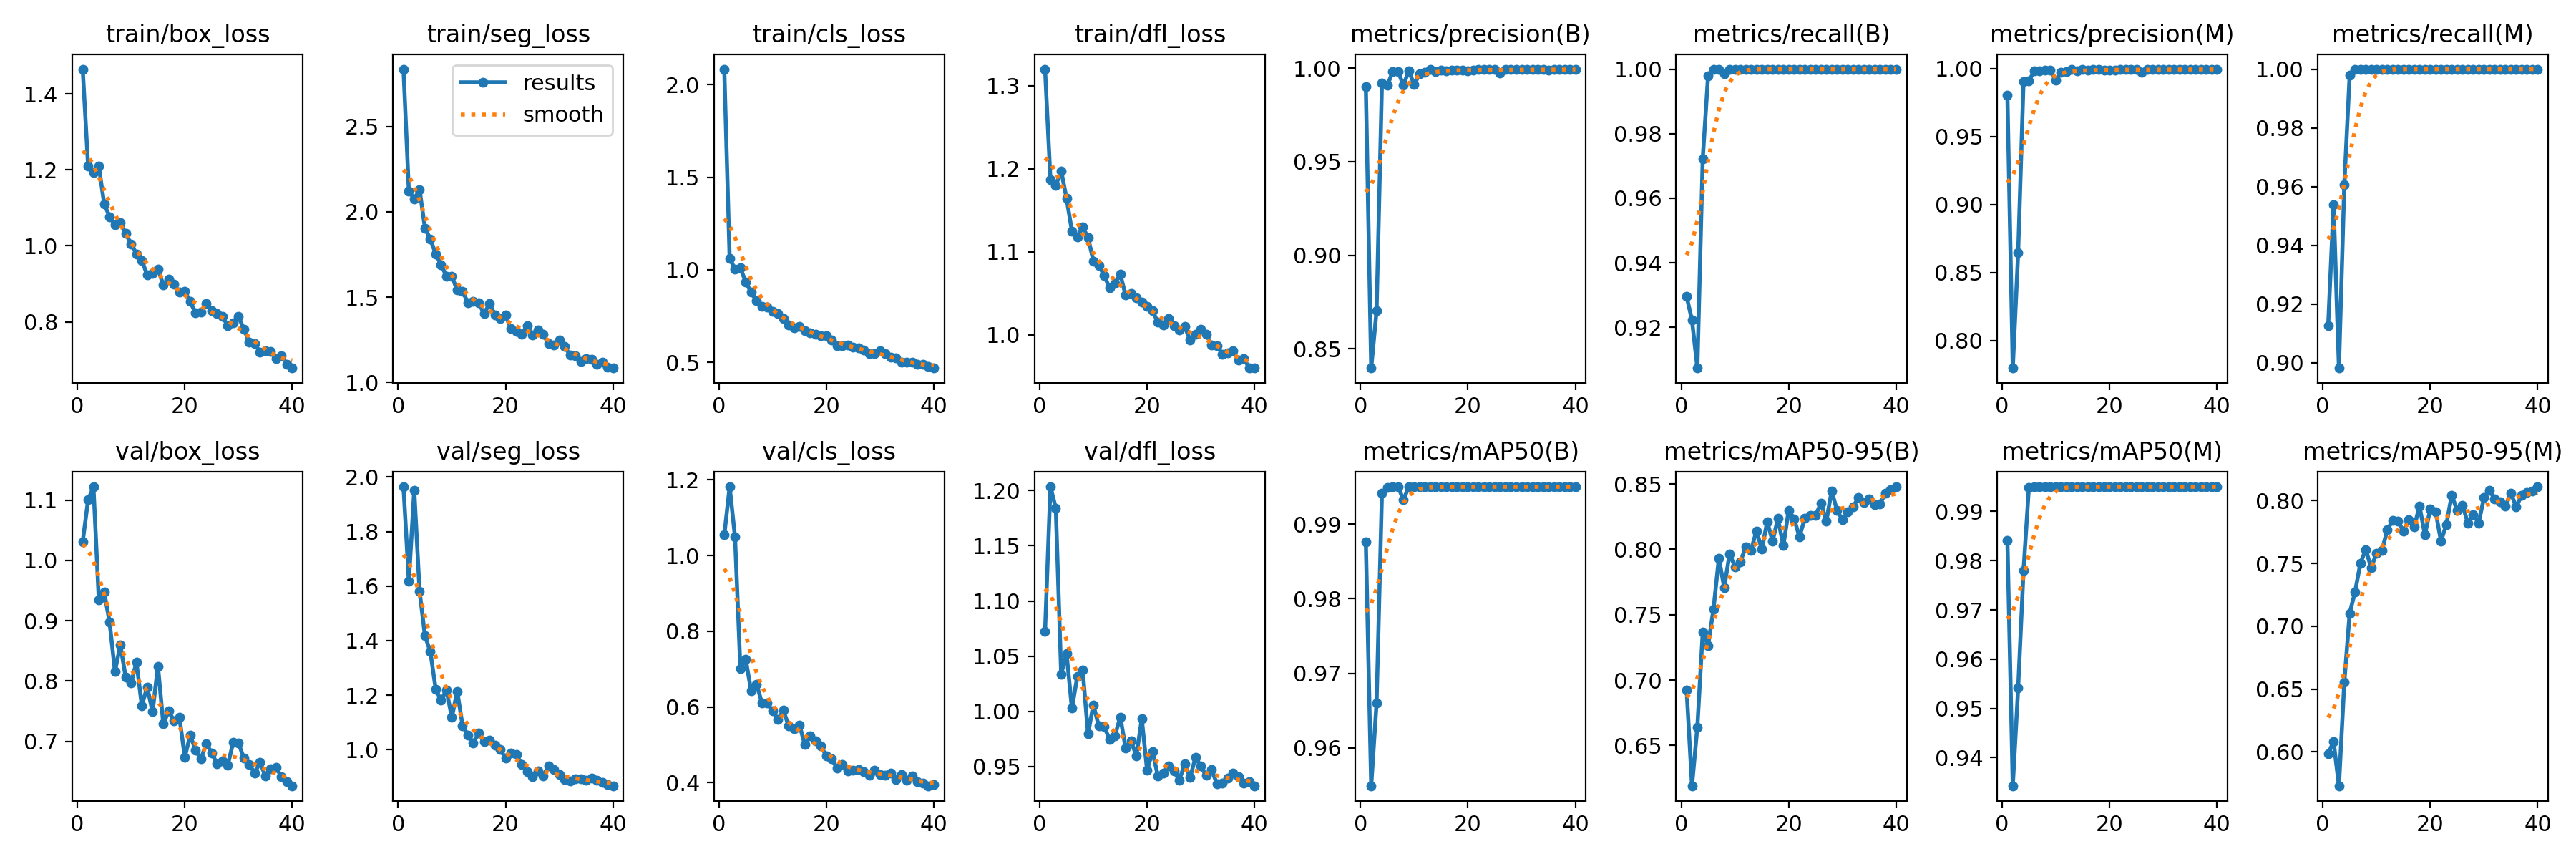

In [11]:
# All training curves, metrics, and other results are stored as images in the 'runs' directory
from IPython.display import Image
Image("/content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40/results.png")

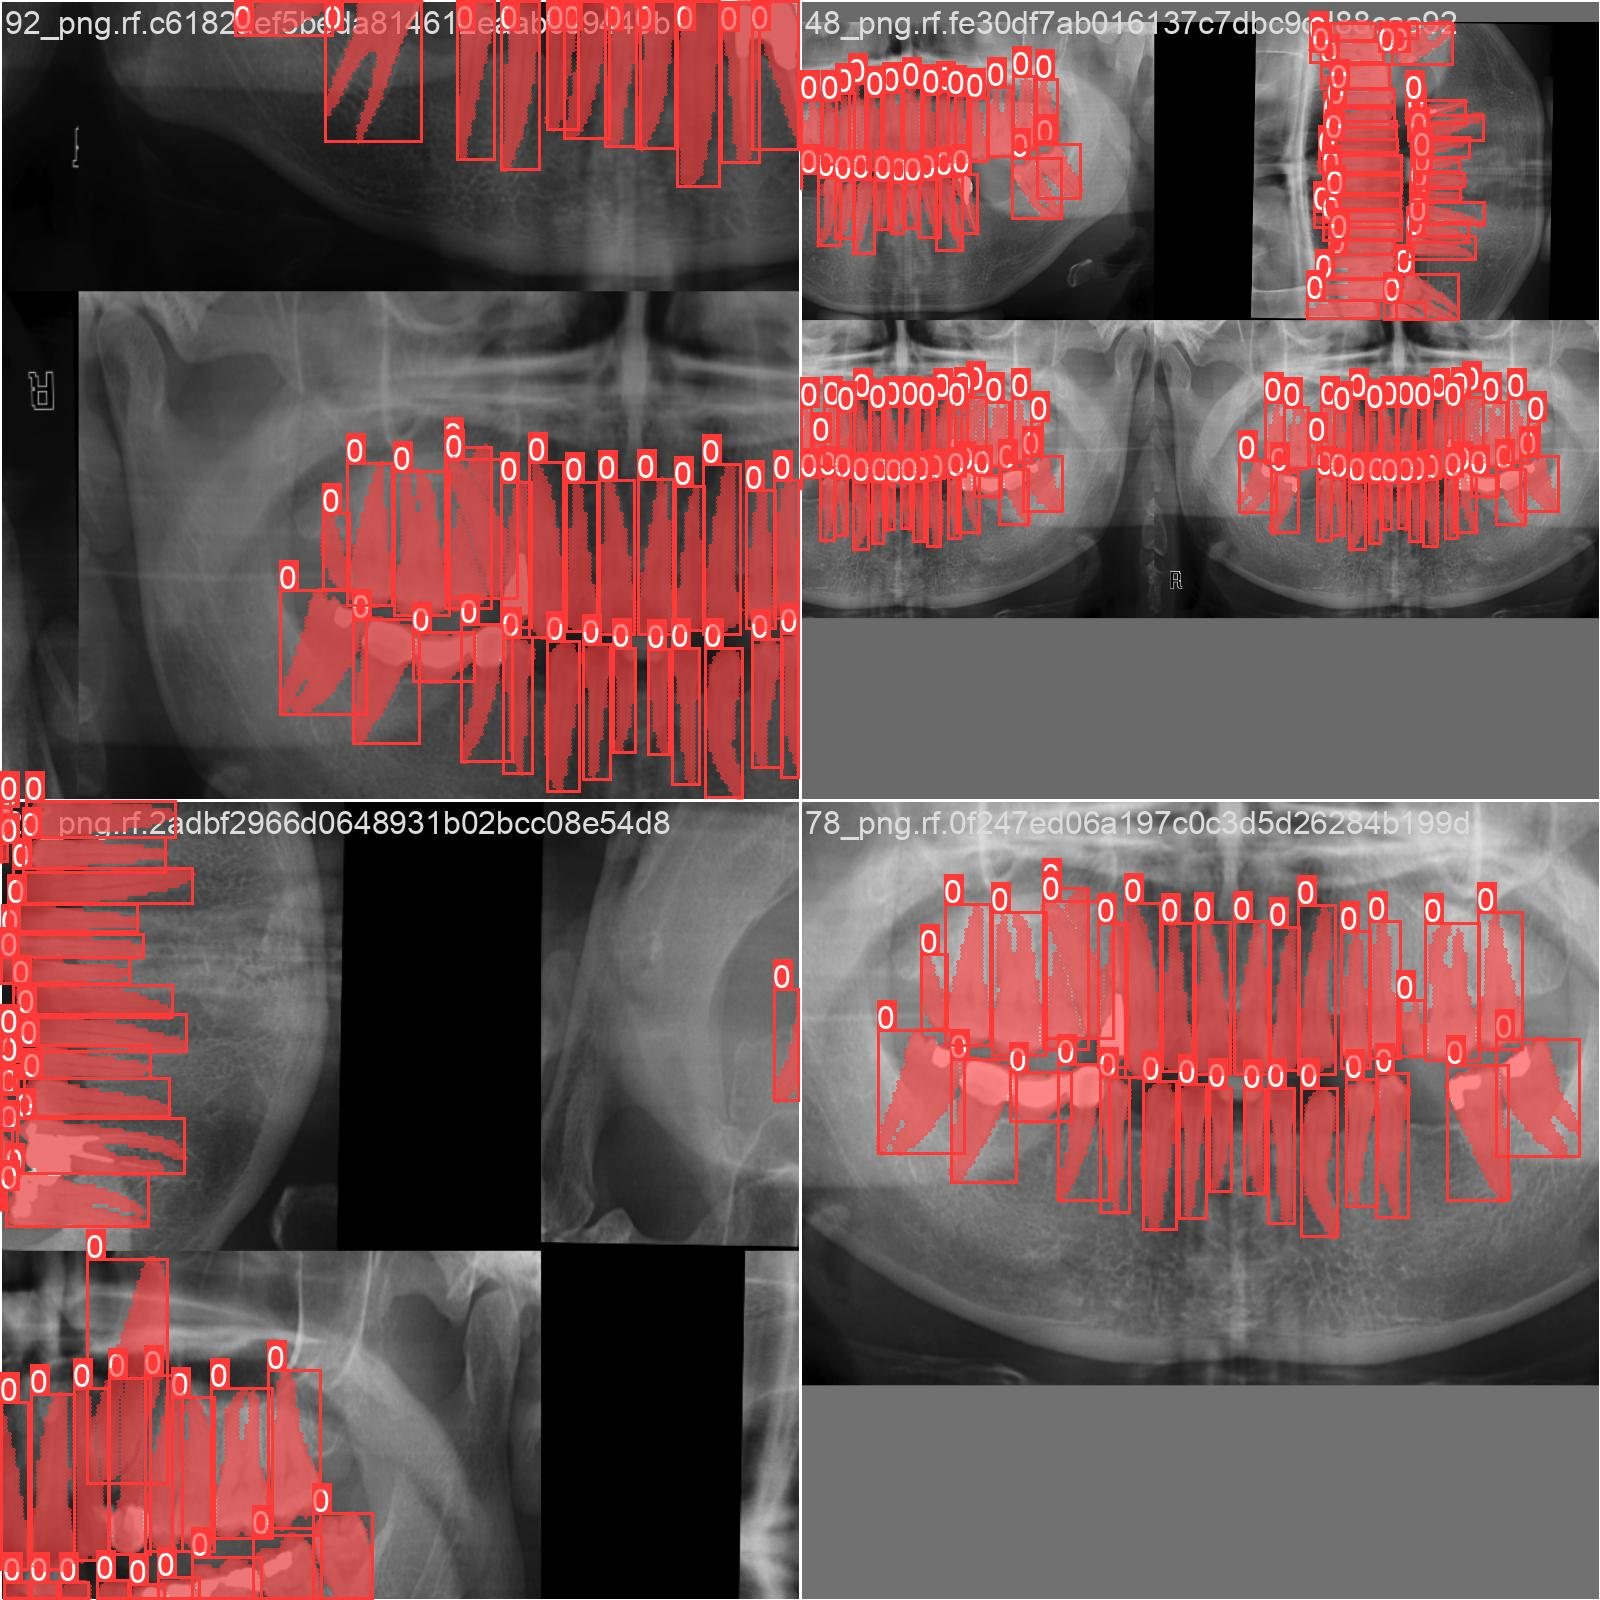

In [12]:
Image(filename = "/content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40/train_batch2.jpg", width=900)

In [ ]:
# now i am loading the last custom model --> /content/drive/MyDrive/YOLOv8_with_cell_+_mitochondria_+_alpha_granule_+_canalicular_vessels/results_of_training/200_epochs-/weights/last.pt
# .pt --> means pretrained weights;

In [14]:
my_new_model = YOLO('/content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/40/weights/last.pt')

In [15]:
new_image = '/content/drive/MyDrive/YOLOv8_with_teeth/Dataset/test/images/111_png.rf.856550f5d3c87af670af666e26c13958.jpg' # loading a new test image;
new_results = my_new_model.predict(new_image, conf=0.01)  # predicting objects on that image by my trained model; conf=0.2 --> confidence score;



image 1/1 /content/drive/MyDrive/YOLOv8_with_teeth/Dataset/test/images/111_png.rf.856550f5d3c87af670af666e26c13958.jpg: 480x800 36 Tooths, 115.1ms
Speed: 3.3ms preprocess, 115.1ms inference, 14.5ms postprocess per image at shape (1, 3, 480, 800)


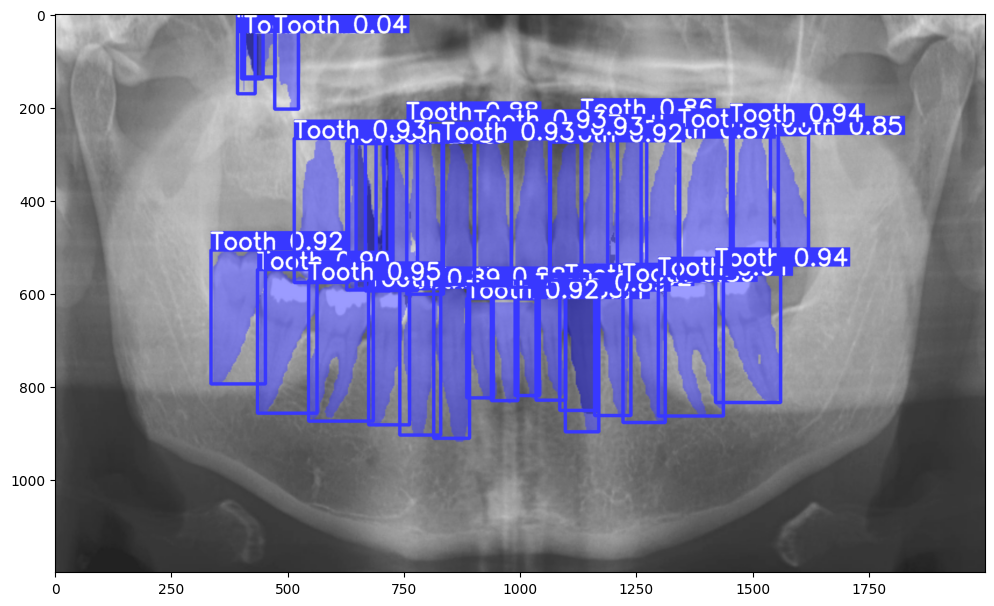

In [16]:
# plotting;
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
plt.imshow(new_result_array)

In [17]:
new_result = new_results[0]
new_result

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: 'Tooth'}
obb: None
orig_img: array([[[223, 223, 223],
        [221, 221, 221],
        [218, 218, 218],
        ...,
        [214, 214, 214],
        [218, 218, 218],
        [219, 219, 219]],

       [[223, 223, 223],
        [222, 222, 222],
        [220, 220, 220],
        ...,
        [214, 214, 214],
        [217, 217, 217],
        [218, 218, 218]],

       [[223, 223, 223],
        [222, 222, 222],
        [222, 222, 222],
        ...,
        [213, 213, 213],
        [216, 216, 216],
        [217, 217, 217]],

       ...,

       [[ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60],
        ...,
        [ 50,  50,  50],
        [ 50,  50,  50],
        [ 50,  50,  50]],

       [[ 60,  60,  60],
        [ 60,  60,  60],
        [ 60,  60,  60],
        ...,
        [ 50,  50,  50],
    

In [ ]:
new_result.masks.xyn # 'Masks.xyn' --> segments (normalized) --> polygons, 'Masks.xy' --> segments (pixels); extracting bounding polygons

[array([[     0.9475,     0.77125],
        [    0.94625,      0.7725],
        [      0.945,      0.7725],
        [      0.945,     0.77375],
        [    0.94375,       0.775],
        [    0.94375,      0.7775],
        [    0.93875,      0.7825],
        [     0.9375,      0.7825],
        [      0.935,       0.785],
        [      0.935,     0.78625],
        [    0.93375,      0.7875],
        [    0.93375,     0.78875],
        [     0.9325,        0.79],
        [     0.9325,     0.79125],
        [    0.93125,      0.7925],
        [    0.93125,     0.79375],
        [       0.93,       0.795],
        [       0.93,     0.79625],
        [    0.92875,      0.7975],
        [    0.92875,     0.79875],
        [     0.9275,         0.8],
        [     0.9275,     0.80125],
        [    0.92625,      0.8025],
        [    0.92625,     0.80375],
        [    0.91625,     0.81375],
        [      0.915,     0.81375],
        [    0.90625,      0.8225],
        [    0.90625,     0.

In [18]:
# extracting segmented masks;
extracted_masks = new_result.masks.data

In [19]:
extracted_masks.shape

torch.Size([36, 480, 800])

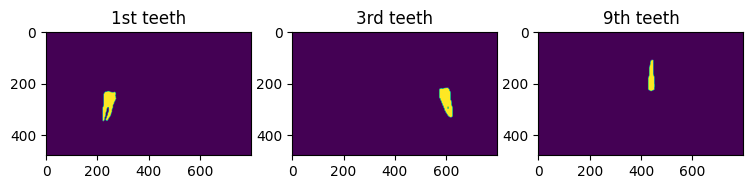

In [37]:
masks_array = extracted_masks.cpu().numpy() # pushing the masks into CPU from GPU for converting into numpy array and for better plotting;

plt.figure(figsize=(9, 12))
plt.subplot(2, 3, 1)
plt.title("1st teeth")
plt.imshow(masks_array[0])
plt.subplot(2, 3, 2)
plt.title("3rd teeth")
plt.imshow(masks_array[2])
plt.subplot(2, 3, 3)
plt.title("9th teeth")
plt.imshow(masks_array[8])
plt.show()


In [38]:
class_names = new_result.names.values()
class_names

dict_values(['Tooth'])

In [39]:
detected_boxes = new_result.boxes.data
class_labels = detected_boxes[:, -1].int().tolist()
masks_by_class = {name: [] for name in new_result.names.values()}
for mask, class_id in zip(extracted_masks, class_labels):
    class_name = new_result.names[class_id]  # Map class ID to class name
    masks_by_class[class_name].append(mask.cpu().numpy())
for class_name, masks in masks_by_class.items():
    print(f"Class Name: {class_name}, Number of Masks: {len(masks)}")

Class Name: Tooth, Number of Masks: 36


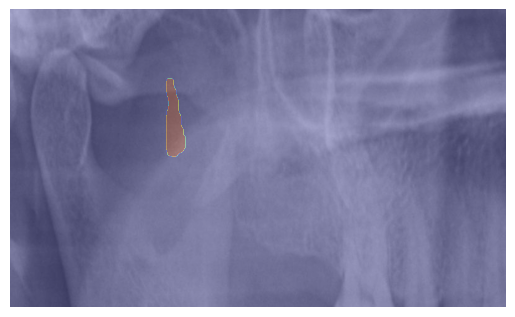

In [46]:
teeth_masks = masks_by_class['Tooth']
orig_img = new_result.orig_img
plt.imshow(orig_img, cmap='gray')
plt.imshow(teeth_masks[23], cmap='jet', alpha=0.3)
plt.axis('off') # Turn off axis labels
plt.show()

In [47]:
import pandas as pd
from skimage.measure import regionprops
props_list = []
for class_name, masks in masks_by_class.items():
    for mask in masks:
        mask = mask.astype(int)
        props = regionprops(mask)
        for prop in props:
            area = prop.area
            perimeter = prop.perimeter
            props_list.append({'Class Name': class_name, 'Area': area, 'Perimeter': perimeter})
props_df = pd.DataFrame(props_list)

In [48]:
props_df.to_csv('/content/drive/MyDrive/YOLOv8_with_teeth/results_of_training/YOLOv8_object_properties.csv', index=False)

In [53]:
props_df

,Class Name,Area,Perimeter
0,Tooth,3847,412.107648
1,Tooth,3430,292.953319
2,Tooth,3919,314.752309
3,Tooth,2394,276.426407
4,Tooth,3177,309.355339
5,Tooth,3858,301.781746
6,Tooth,3014,292.426407
7,Tooth,3575,292.509668
8,Tooth,2232,268.426407
9,Tooth,1445,199.112698
